In [20]:
!pip install nltk
!pip install wordcloud
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt


In [22]:
# Downloading data for Lemmitization process
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# installing wordcloud
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Read data from CSV file
df = pd.read_csv(r"reviews (1).csv")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saiun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
#Converting into lower case
df['content']=df['content'].str.lower()

In [25]:
#Removing links
df['content'] = df['content'].fillna('')
df['content'] = df['content'].apply(lambda x: re.sub(r"http\S+", "", x))

In [26]:
#Remove next lines
df['content'] = df['content'].str.replace('\n',' ')

In [27]:
#Removing words containing numbers
pattern = r'\b\w*\d\w*\b'

def remove_words_containing_numbers(text):
    return re.sub(pattern, '', text)

df['content'] = df['content'].apply(remove_words_containing_numbers)

In [28]:
#Removing extra spaces
df['content'] = df['content'].apply(lambda x: ' '.join(x.split()))

In [29]:
#Removing special characters
df['content'] = df['content'].apply(lambda x: re.sub('[^A-Za-z0-9]+', '', x))

In [30]:
#Removing stop words
stop_words = set(stopwords.words('english'))

In [31]:
# applying the process of removing the stop words using function
def removing_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(text)

df['content'] = df['content'].apply(removing_stopwords)

In [34]:
#Stemming process
stemmer = PorterStemmer()
# applying the process

def stemming_process(word):
    return stemmer.stem(word)
#calling the function
df['content'] = df['content'].apply(lambda x: ' '.join(stemming_process(word) for word in x.split()))

In [35]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
df['content'] = df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
#creating a function to perform sentiment analysis using VADER
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment = 'positive' if sentiment_scores['compound'] > 0.05 else 'negative' if sentiment_scores['compound'] < -0.05 else 'neutral'
    return sentiment
#function calling
df['sentiment'] = df['content'].apply(analyze_sentiment_vader)

In [ ]:
# function for wordcloud
def generate_wordcloud(text):
    wc = WordCloud(width=800, height=400, max_words=50, background_color='white', colormap='viridis').generate(text)
    return wc
# function calling
text = ' '.join(df['content'])
wordcloud = generate_wordcloud(text)
# plot represntation
plt.figure(figsize=(10, 7))
plt.title('Representation')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

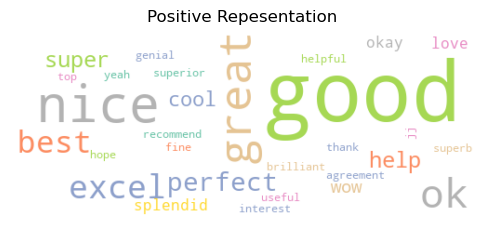

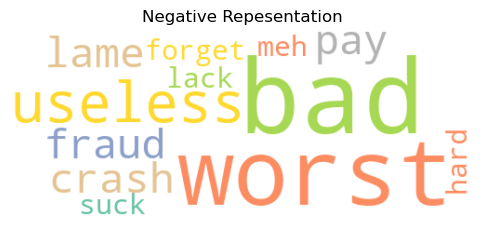

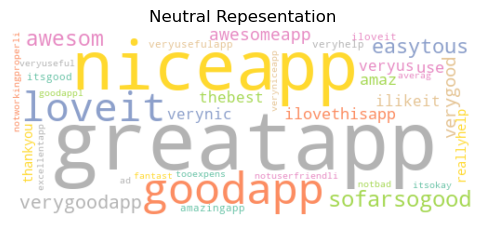

In [19]:
#positive, negative, and neutral categories representation
for sentiment in ['positive', 'negative', 'neutral']:
    text = ' '.join(df[df['sentiment'] == sentiment]['content'])
    wc = WordCloud(width=500, height=200, max_words=50, background_color='white', colormap='Set2').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(sentiment.capitalize() + ' Repesentation')
    plt.axis('off')
    plt.show()